Define paths

In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from database.databaseFunctions import *
import seaborn as sns



Define variables and upload data for figures

In [2]:
circuit_n='turinghill'
variant= 11
n_species=2
mechanism='nogrowth'


query = f'''select mp."parID", ao."ssID", ao.system_class, pco.wavelength, ao.estimated_wvl, pco.convergence_time, ao.maxeig from pattern_class_output pco
-- select * from pattern_class_output pco
inner join model_param mp on pco.model_param_id = mp.model_param_id
inner join analytical_output ao on (ao.model_param_id,ao."ssID") = (pco.model_param_id, pco."ssID")

where ao.system_class in ('turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf', 'turing semi-hopf')

and mp.variant='{variant}'
-- where simulation_param_uuid='b94c9e61-a717-4470-957b-a59ff727e948'
and simulation_param_uuid='132323a4-3f93-4287-aca9-d18e84848e37';'''

df = df_from_general_query(query)
df = df.dropna()


/Users/mo2016/Documents/modelling/lib/database/databaseFunctions.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,con=conn)


In [3]:
len(df)

500

In [3]:
df = df.dropna()


In [10]:
df

,parID,ssID,system_class,wavelength,estimated_wvl,convergence_time,maxeig
0,6666265,0,turing I oscillatory,2.612500,2.352941,300.0,0.667266
1,6758739,0,turing I oscillatory,2.086364,1.481481,240.0,0.435419
2,2915643,0,turing I oscillatory,0.776510,0.611621,40.0,14.571536
3,6603224,0,turing I oscillatory,1.355882,1.098901,450.0,3.507343
4,8740366,0,turing I oscillatory,2.908750,2.702703,580.0,0.557912
...,...,...,...,...,...,...,...
509,5630810,0,turing I hopf,1.536667,1.290323,840.0,4.998539
510,8096713,0,turing I oscillatory,5.925000,2.352941,20.0,0.163057
511,497283,0,turing I hopf,1.628182,1.408451,510.0,3.126459
513,8845788,1,turing I oscillatory,1.121481,0.772201,30.0,2.665071


In [4]:
sns.set_context("poster")

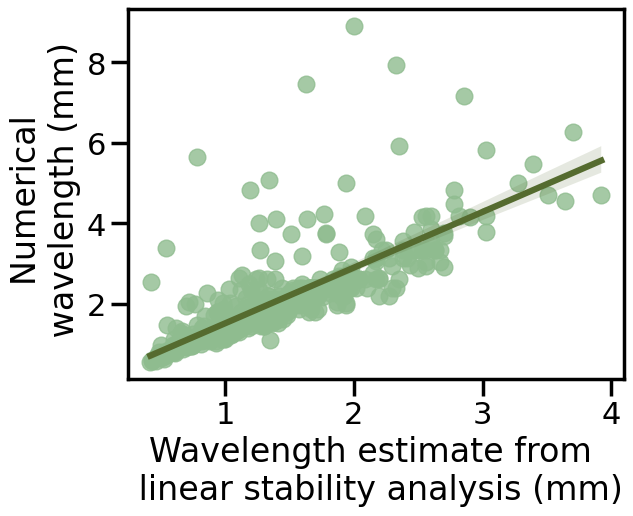

Slope: 0.4192872117400419
Intercept: 0.7088365143645833


In [5]:
# plt.figure(figsize=(2,5))
sns.regplot(x='estimated_wvl', y='wavelength', data=df, color='darkseagreen', line_kws={"color": "darkolivegreen"} )
plt.xlabel('Wavelength estimate from \n linear stability analysis (mm)')
plt.ylabel('Numerical \n wavelength (mm)')
# plt.xlim(0,9)
# plt.ylim(0,10)
# plt.savefig('/Users/mo2016/Documents/modelling/growth/out/patternAnalysis/wavelength_convergence/wavelength_lsa_numerical.pdf')
# Get the current axes from the plot
ax = plt.gca()

# Get the regression line's Line2D object
line = ax.get_lines()[0]

# Extract the slope and intercept
slope, intercept = line.get_data()

plt.show()

print("Slope:", slope[0])  # The slope is the first value in the line data
print("Intercept:", intercept[0])  # The intercept is the first value in the line data

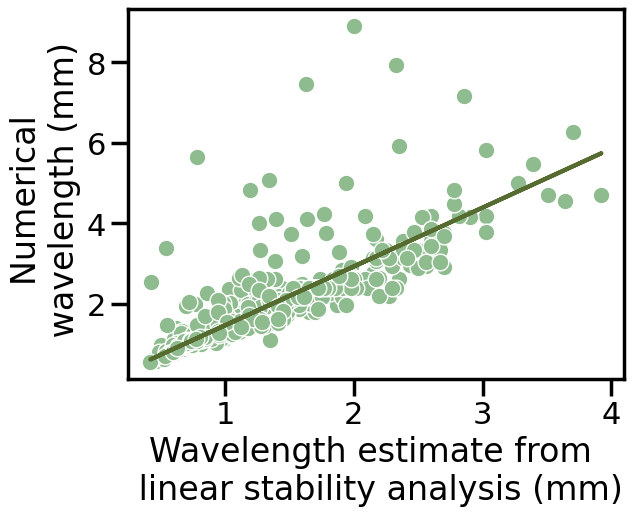

Slope: 1.4623566760577682


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Compute the slope (m) of the line (y = mx) using numpy
# np.linalg.lstsq expects x values in a column format ([x, 1])
x = df['estimated_wvl'].values[:, np.newaxis]
y = df['wavelength'].values

# We use np.linalg.lstsq with an array of ones as the second argument to force the intercept to zero
slope, _, _, _ = np.linalg.lstsq(x, y, rcond=None)

# Plotting the scatter plot
# plt.figure(figsize=(2,5))
sns.scatterplot(x='estimated_wvl', y='wavelength', data=df, color='darkseagreen')

# Plotting the regression line
plt.plot(df['estimated_wvl'], slope[0] * df['estimated_wvl'], color="darkolivegreen")

plt.xlabel('Wavelength estimate from \n linear stability analysis (mm)')
plt.ylabel('Numerical \n wavelength (mm)')

# Uncomment these if you need to set limits
# plt.xlim(0, 9)
# plt.ylim(0, 10)

# Uncomment to save the figure
# plt.savefig('/Users/mo2016/Documents/modelling/growth/out/patternAnalysis/wavelength_convergence/wavelength_lsa_numerical.pdf')
plt.show()

print("Slope:", slope[0])


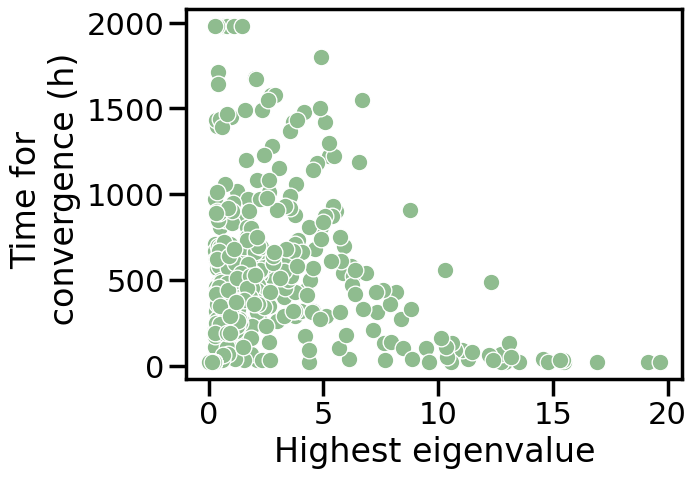

In [26]:
sns.scatterplot(x='maxeig' ,y='convergence_time', data=df,color='darkseagreen')
plt.xlabel('Highest eigenvalue')
plt.ylabel('Time for \n convergence (h)')
# plt.xscale('log')
# plt.xlim(0.3,30)
# plt.yscale('log')
plt.savefig('/Users/mo2016/Documents/modelling/growth/out/patternAnalysis/wavelength_convergence/convergence_lsa_numerical.pdf')
plt.show()

In [ ]:
from scipy.optimize import least_squares

# 1. Define the function
def func(x, a):
    return 1/np.log(x)
    # return a*b*x

# 2. Define the residuals function
def residuals(params, x, y_observed):
    return y_observed - func(x, *params)

def fit(x,y):
    initial_guess = [1]
    result = least_squares(residuals, initial_guess, args=(x, y))
    a_fit = result.x
    return [a_fit], func(x,a_fit)
    
fit(df['convergence_time'], df['maxeig'])